# Исследование рынка общественного питания в Москве

Требуется провести исследование о заведениях общественного питания в Москве для инвесторов, которые хотят вложить деньги в новое кафе

### Описание данных

Информация о точках общественного питания:
- название объекта общественного питания;  
- является ли объект частью сети (да/нет);  
- тип объекта общественного питания;  
- адрес;  
- количество посадочных мест.

### План проекта:  
[Шаг 1. Загрузка данных и подготовка к анализу](#step1)

[Шаг 2. Анализ данных](#step2)  
- [Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.](#step2.1)
- [Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.](#step2.2)
- [Для какого вида объекта общественного питания характерно сетевое распространение?](#step2.3)
- [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#step2.4)
- [Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики](#step2.5)
- [Выделите в отдельный столбец информацию об улице из столбца address .](#step2.6)
- [Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#step2.7)
- [Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#step2.8)
- [Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?](#step2.9)
- [Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также месте расположения. Прокомментируйте возможность развития сети.](#step2.10)  

[Шаг 3. Подготовка презентации](#step3)

### <a id="step1"> Шаг 1. Загрузка данных и подготовка к анализу</a>

Напишем функцию для пути файла, чтобы файл открывался и на локальном компьютере, и в практикуме

In [2]:
import os
def try_path(path):
    if os.path.exists(path):
        return path
    else:
        return "." + path

Подключим библиотеки, которые нам потребуются в дальнейшем

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from io import BytesIO

import requests

from IPython.display import display

Поставим параметр максимальное количество выводимых строк - 300 и максимальное количество символов в выводе - 500

In [4]:
pd.set_option('display.max_rows', 300)
pd.options.display.max_colwidth = 500

Зададим цветовую палитру для графиков

In [5]:
sns.set_palette('pastel')

Создадим dataframe c информаций об объектах питания. Посмотрим 5 случайных записей из него

In [6]:
df = pd.read_csv(try_path('/datasets/rest_data.csv'))
df.sample(5)

,id,object_name,chain,object_type,address,number
2959,21523,Столовая при школе,нет,столовая,"город Москва, Клинская улица, дом 24",80
8727,128312,Бургер Кинг,да,предприятие быстрого обслуживания,"город Москва, Головинское шоссе, дом 5, корпус 1",45
10188,170093,GRAND УРЮК,да,ресторан,"город Москва, Ленинградский проспект, дом 37Б",96
15104,209238,Бургер Кинг,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
12240,192548,Маковка,нет,кафетерий,"город Москва, Сокольническая площадь, дом 4А",2


Посмотрим информацию о таблице. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Объем данных - 13566 записей. Пропущенных значений нет. Все типы данных корректны кроме значения chain. В chain хранятся значения "нет" или "да" в зависимости от того является ли ресторан сетевым. Заменим значения на True/False для более удобной работы в дальнейшем, к тому же хранение булевых значений займет меньше места

Проверим не хранится ли в колонке chain что-то кроме значений нет/да

In [8]:
df['chain'].unique()

array(['нет', 'да'], dtype=object)

Никаких значений кроме "нет" и "да" в колонке chain нет. Заменим значения в этой колонке на True/False и приведем к булевому типу

In [9]:
df['chain'] = df['chain'].map({'нет': False, 'да': True})
df['chain'] = df['chain'].astype('bool')
display(df.head())
display(df['chain'].dtype)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


dtype('bool')

Посмотрим какие типы общественного питания есть. Нет ли там каких-то ошибок

In [10]:
df['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Все названия выглядят корректно

Все типы данных корректны

Посмотрим на значения в поле number. Нет ли там некорректных данных

In [11]:
df['number'].describe()

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

Есть подозрительные значения.  Нулевая вместимость и вместимость в 1700 человек. Посмотрим на эти записи

In [12]:
display(df.query('number == 1700').head())
display(df.query('number == 0').head())

,id,object_name,chain,object_type,address,number
12723,199696,Arena by Soho Family,False,бар,"город Москва, Кутузовский проспект, дом 36, строение 11",1700


,id,object_name,chain,object_type,address,number
137,115498,Пекарня & Донер,False,закусочная,"город Москва, Бутырская улица, дом 9, корпус 2",0
154,152556,Шаурма в пите,False,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0
157,149568,Суши,False,предприятие быстрого обслуживания,"город Москва, улица Маршала Василевского, дом 3, корпус 1",0
190,126956,"Шаурма, куры-гриль",False,предприятие быстрого обслуживания,"город Москва, 1-я Владимирская улица, дом 21",0
195,149531,"Шаурма, куры-гриль",False,предприятие быстрого обслуживания,"город Москва, 2-я Владимирская улица, дом 44/10",0


Место с 1700 мест - концертная площадка с баром и это объясняют такую большую вместимость. Посмотрим в каких типах заведений нет посадочных мест

In [13]:
df.query('number == 0')['object_type'].value_counts()

предприятие быстрого обслуживания    704
кафе                                 310
закусочная                           189
магазин (отдел кулинарии)            145
кафетерий                            113
буфет                                 68
ресторан                              45
бар                                   28
столовая                              19
Name: object_type, dtype: int64

Для предприятий быстрого обслуживания, закусочных, кулинарий, буфетов - это ожидаемо. Посмотрим на другие типы

In [14]:
display(df.query('number == 0 and object_type == "кафе"').head())
display(df.query('number == 0 and object_type == "ресторан"').head())
display(df.query('number == 0 and object_type == "бар"').head())
display(df.query('number == 0 and object_type == "столовая"').head())

,id,object_name,chain,object_type,address,number
577,149220,Кофейня «Кофе Хаус»,True,кафе,"город Москва, Павелецкая площадь, дом 1А, строение 1",0
802,142581,Кофе Энигма,False,кафе,"город Москва, Овчинниковская набережная, дом 22/24, строение 1",0
1148,155495,Суши Wok,True,кафе,"город Москва, Таганская улица, дом 31/22",0
2750,152207,Правда кофе,False,кафе,"город Москва, Нижняя Красносельская улица, дом 5, строение 1",0
2995,156171,ДонерОК,False,кафе,"город Москва, Кронштадтский бульвар, дом 3, строение 3",0


,id,object_name,chain,object_type,address,number
1873,79718,Макдоналдс,True,ресторан,"город Москва, поселение Московский, деревня Говорово, дом 1Б/Н",0
4490,152298,Фудмаркет. Яшечкина,False,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4491,152299,Фудмаркет. Грачева,False,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4492,152305,Фудмаркет. Шапиро,False,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4493,152307,Фудмаркет. Салпагарова,False,ресторан,"город Москва, улица Новый Арбат, дом 21",0


,id,object_name,chain,object_type,address,number
1802,106196,Бар «ПОПКОРН»,False,бар,"город Москва, микрорайон Северное Чертаново, дом 1А",0
2510,155560,Японский пес,False,бар,"город Москва, улица Академика Янгеля, дом 6, корпус 1",0
6116,20410,СЕРДОЛИК-Ю,False,бар,"город Москва, Профсоюзная улица, дом 61А",0
7569,107408,Бар «КОНСЕШН БАР»,False,бар,"город Москва, Днепропетровская улица, дом 2",0
7859,77595,Бильярдная Сова,False,бар,"город Москва, Марксистская улица, дом 34, корпус 8",0


,id,object_name,chain,object_type,address,number
206,150836,ГБОУ Школа №1468,False,столовая,"город Москва, Волгоградский проспект, дом 17, строение 1",0
2101,29844,Вкусный выбор,False,столовая,"город Москва, аллея Жемчуговой, дом 1А",0
2130,152335,Пищеблок ( закрытое),False,столовая,"город Москва, Ленинский проспект, дом 8, корпус 23",0
2675,23137,Самса Хаус,False,столовая,"город Москва, Широкая улица, дом 12",0
4176,150827,ГБОУ Школа №498,False,столовая,"город Москва, улица Малые Каменщики, дом 18",0


В этих заведениях и правда нет посадочных мест: что-то работает только на вынос, что-то является "островком" в ТЦ и т.д.

Приведем названия объектов к нижнему регистру, чтобы исключить дубли, связанные с написанием имени в разных регистрах

In [15]:
df['object_name'] = df['object_name'].str.lower()
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Посмотрим нет ли полных дублей

In [16]:
df.duplicated().sum()

0

Полных дублей нет. Проверим нет ли дублей - ресторанов с одинаковым именем, типом и адресом

In [17]:
df.duplicated(subset = ['address','object_name','object_type']).sum()

184

Такие записи есть. Посмотрим на них

In [18]:
df[df.duplicated(subset = ['address','object_name','object_type'], keep = False)].sort_values(by = ['object_name','address'])

,id,object_name,chain,object_type,address,number
8004,153873,eat and talk,False,ресторан,"город Москва, улица Воздвиженка, дом 4/7, строение 2",80
8005,154087,eat and talk,False,ресторан,"город Москва, улица Воздвиженка, дом 4/7, строение 2",10
6371,135225,il patio,False,ресторан,"город Москва, Манежная площадь, дом 1, строение 2",89
6372,135231,il patio,False,ресторан,"город Москва, Манежная площадь, дом 1, строение 2",45
2869,25031,laltro bosco,False,ресторан,"город Москва, улица Петровка, дом 10",145
...,...,...,...,...,...,...
15363,209186,шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",20
14376,217108,шурма,False,предприятие быстрого обслуживания,"город Москва, Ярцевская улица, дом 25А",0
14379,217555,шурма,False,предприятие быстрого обслуживания,"город Москва, Ярцевская улица, дом 25А",0
5131,71779,щербакова людмила анатольевна,False,кафе,"город Москва, улица Сущёвский Вал, дом 5, строение 1А",20


В этих записях совпадают имя, адрес, тип, а вместимость разная. Так как в таких дублях мы не знаем корректную вместимость, то дубли удалим, но в качестве вместимости укажем null

Возможная причина появления таких дублей - загрузка данных из нескольких источников ( в разных источниках могла быть указана разная вместимость ресторанов), загрузка новых данных поверх неудаленных старых записей.


In [19]:
ids = df[df.duplicated(subset = ['address','object_name','object_type'], keep = False)]['id'] # находим id дублей
df.loc[df['id'].isin(ids),'number'] = np.NaN # записываем в качетсве вместимости null
df.loc[df['id'].isin(ids)].head()

,id,object_name,chain,object_type,address,number
113,28608,комбинат питания мгту им.н.э.баумана,False,буфет,"город Москва, Бригадирский переулок, дом 3-5",NaN
115,28614,комбинат питания мгту им.н.э.баумана,False,буфет,"город Москва, Бригадирский переулок, дом 3-5",NaN
576,149218,общественное питание,False,кафе,"город Москва, Павелецкая площадь, дом 1",NaN
580,149205,общественное питание,False,кафе,"город Москва, Павелецкая площадь, дом 1",NaN
581,149131,общественное питание,False,кафе,"город Москва, Павелецкая площадь, дом 1",NaN


Удаляем дубли

In [20]:
df.drop_duplicates(subset = ['address','object_name','object_type'],inplace = True)
df.duplicated(subset = ['address','object_name','object_type']).sum()

0

Заменим названия столбцов на более удобные

In [21]:
df.columns = ['id','name','chain','type','address', 'number']
df.head()

,id,name,chain,type,address,number
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48.0
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35.0
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95.0
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40.0
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50.0


### Вывод

Изучили данные и подготовили их к дальнейшему анализу:
- пропущенных значений нет
- Изменили значение chain с да/нет на True/False, поменяли тип данных на bool
- Привели названия заведений к нижнему регистру, чтобы исключить дубли, связанные с разным написанием одного и того же имени
- Нашли дубли по имени, типу и адресу. Заменили у этих дублей значение вместимости на null. Дубли удалили. Возможная причина появления таких дублей - загрузка данных из нескольких источников ( в разных источниках могла быть указана разная вместимость ресторанов), загрузка новых данных поверх неудаленных старых записей.
- Заменили названия столбцов на более удобные

### <a id="step2">Шаг 2. Анализ данных</a>

- ### <a id="step2.1"> Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график</a>

Посмотрим сколько точек есть в каждом из видов общественного питания

In [22]:

df['type'].value_counts()

кафе                                 6008
столовая                             2575
ресторан                             2274
предприятие быстрого обслуживания    1890
бар                                   853
буфет                                 570
кафетерий                             393
закусочная                            347
магазин (отдел кулинарии)             272
Name: type, dtype: int64

Больше всего кафе - около 6000, столовых и ресторанов около 2500. Кафетериев, закусочных и кулинарий совсем немного, меньше 500 заведений каждого из типов

Построим круговую диаграмму для видов точек питания

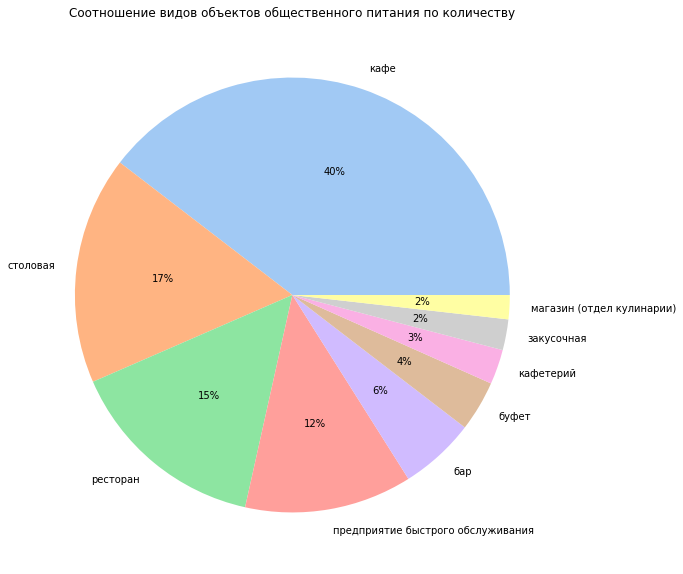

In [23]:
ax = df['type'].value_counts().plot(kind = 'pie', figsize=(20, 10),autopct='%1.0f%%', \
                                    title = 'Соотношение видов объектов общественного питания по количеству');
ax.set_ylabel('');

### Вывод

Объекты общественного питания распределены следующим образом:
- 40% кафе (около 6000 объектов)
- 17% столовые (около 2500 объектов)
- 15% рестораны (около 2200 объектов)
- 12% предприятия быстрого обслуживания (около 1900 объектов)
- 6% бары(около 850 объектов)
- от 2% до 4% буфеты, кафетерии, закусочные, кулинарии

- ### <a id="step2.2">Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.</a>`

Посмотрим сколько заведений сетевых и несетевых 

In [24]:
df['chain'].value_counts()

False    12234
True      2948
Name: chain, dtype: int64

Несетевых заведений в разы больше чем сетевых

Посмотрим круговую дианрамму для соотношения количества сетевых и несетевых заведений

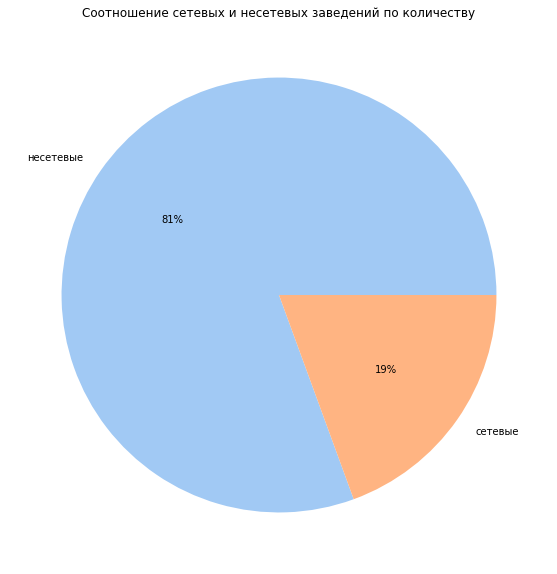

In [25]:
ax = df['chain'].value_counts().plot(kind = 'pie', figsize=(20, 10),autopct='%1.0f%%', \
                                    title = 'Соотношение сетевых и несетевых заведений по количеству',\
                                    labels = ['несетевые','сетевые']);
ax.set_ylabel('');

### Вывод

Соотношение несетевых к сетевым объектам почти выполняет принцип Парето 80 к 20. Несетевых заведений 81%, сетевых - 19%

- ### <a id="step2.3"> Для какого вида объекта общественного питания характерно сетевое распространение?</a>

Для каждого типа объектов общественного питания посчитаем какую долю он сотавляет от всего количества в сетевых заведениях и несетевых

In [26]:
chain_type_ratio = df.groupby(['type','chain']).agg({'id':'count'}).reset_index()
chain_type_ratio.columns = ['type','chain','qty']
chain_qty = chain_type_ratio[chain_type_ratio['chain']].qty.sum()
not_chain_qty = chain_type_ratio[~chain_type_ratio['chain']].qty.sum()
chain_type_ratio.loc[chain_type_ratio['chain'],'ratio'] = chain_type_ratio['qty'] / chain_qty * 100
chain_type_ratio.loc[~chain_type_ratio['chain'],'ratio'] = chain_type_ratio['qty'] / not_chain_qty * 100
chain_type_ratio

,type,chain,qty,ratio
0,бар,False,816,6.669936
1,бар,True,37,1.255088
2,буфет,False,559,4.569233
3,буфет,True,11,0.373134
4,закусочная,False,291,2.378617
5,закусочная,True,56,1.899593
6,кафе,False,4621,37.771784
7,кафе,True,1387,47.048847
8,кафетерий,False,342,2.795488
9,кафетерий,True,51,1.729986


Построим график, отображающий доли типов объекта общественного питания в сетевых и несетевых заведениях

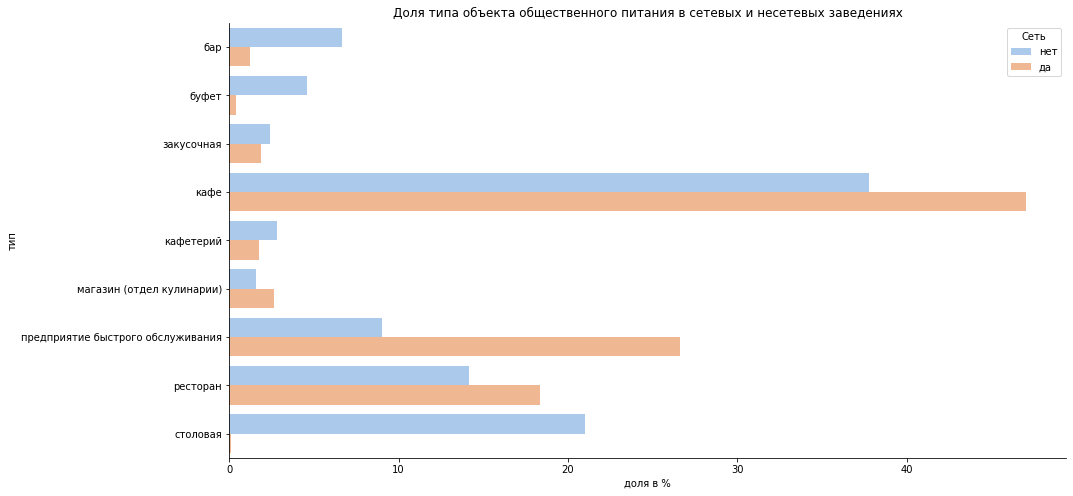

In [27]:
plt.figure(figsize=(15,8));
ax = sns.barplot(x='ratio',y='type',hue = 'chain',  data=chain_type_ratio);
ax.set_title('Доля типа объекта общественного питания в сетевых и несетевых заведениях');
ax.set_xlabel('доля в %');
ax.set_ylabel('тип');

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['нет','да'],title='Сеть')

sns.despine();


### Вывод

Сетевое распространение характерно предприятий быстрого обслуживания, ресторанов, кафе и кулинарий

- ### <a id="step2.4"> Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?</a>

Построим распределение количества посадочных мест для сетевых заведений

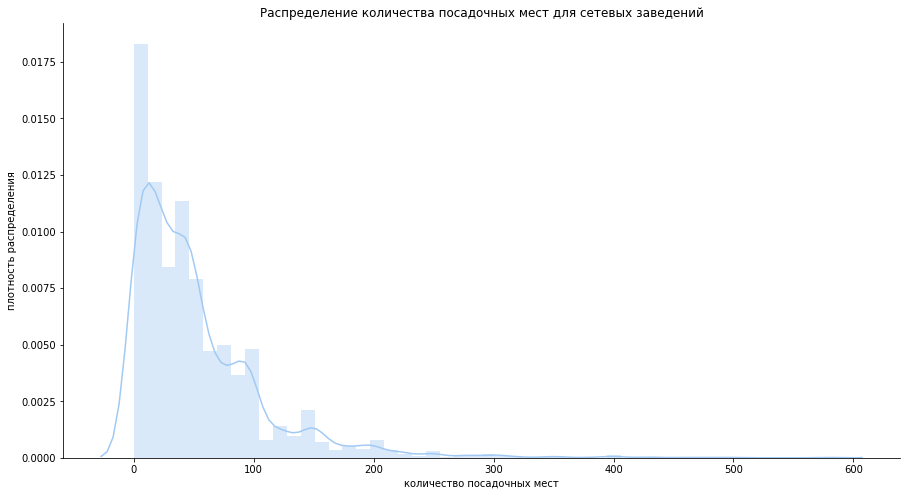

In [28]:
plt.figure(figsize=(15,8));
ax = sns.distplot(df[df['chain']]['number'].dropna())
ax.set_title('Распределение количества посадочных мест для сетевых заведений');
ax.set_xlabel('количество посадочных мест');
ax.set_ylabel('плотность распределения');
sns.despine();

### Вывод

Если считать небольшим количеством мсет количество мест до 20, а большим - свыше 100, то можно сказать, что для сетевых заведений характерно большое количество заведений с небольшим количеством мест

- ### <a id="step2.5">Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики

Построим ящик с усами для количества посадочных мест для каждого из типов точек общественного питания

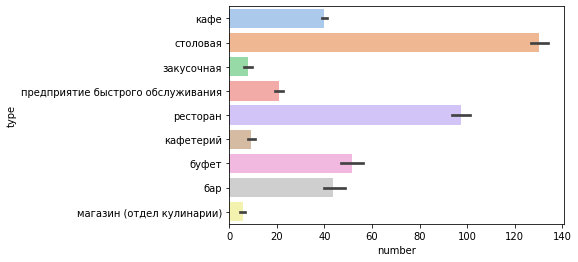

In [29]:
ax = sns.barplot(y='type',x='number',data = df);

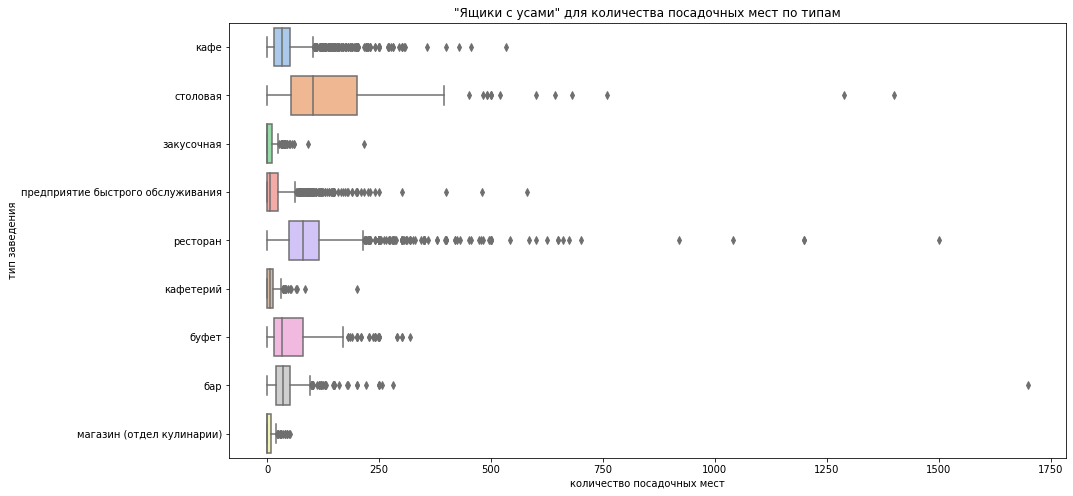

In [28]:
plt.figure(figsize=(15,8));
ax = sns.boxplot(y='type',x='number',data = df);
ax.set_title('"Ящики с усами" для количества посадочных мест по типам');
ax.set_xlabel('количество посадочных мест');
ax.set_ylabel('тип заведения');

Для многих заведений есть очень много выбросов сверху, было бы некорректно в качестве меры центральной тенденции брать среднее. Посмотрим медианы для количества посадочных мест по типам

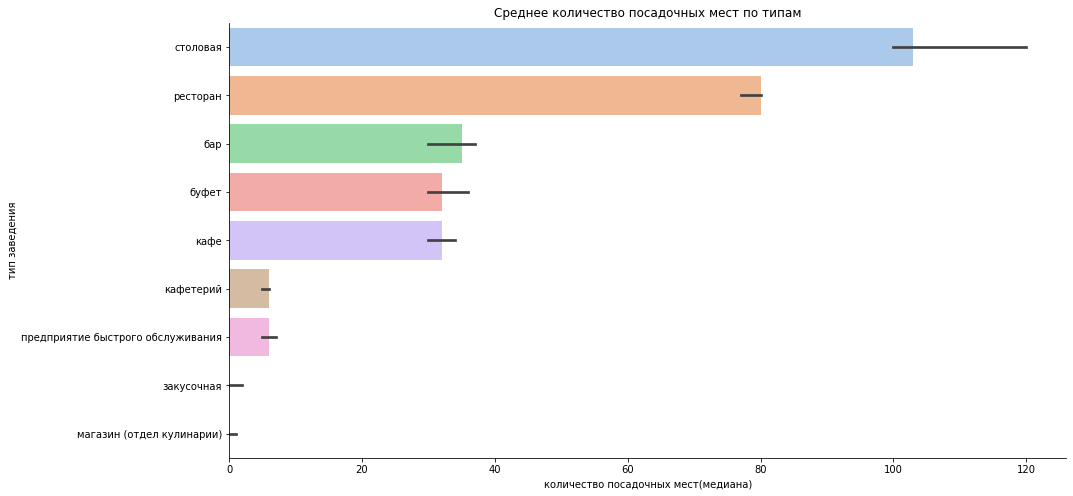

In [29]:
order = df.groupby('type').agg({'number':'median'}).sort_values(by='number', ascending = False).index
plt.figure(figsize=(15,8));
ax = sns.barplot(y='type',x='number',data = df, estimator = np.median,order=order);
ax.set_title('Среднее количество посадочных мест по типам');
ax.set_xlabel('количество посадочных мест(медиана)');
ax.set_ylabel('тип заведения');
sns.despine()

### Вывод

- Больше всего посадочных мест в столовых, более 100
- В ресторанах мест около 90
- В барах, буфетах  и кафе чуть больше 30
- В кафетериях и предприятиях быстрого обслуживания меньше 10
- В закусочных и кулинариях обычно нет посадочных мест

- ### <a id="step2.6">Выделите в отдельный столбец информацию об улице из столбца address .

Напишем функцию, которая будет по адресу возвращать город и улицу. В поиске города и улицы будем использовать следующий факт: практически во всех адресах название улицы  идет перед номером дома/владения, название населенного пункта идет перед названием улицы. Но есть исключения:
- В Зеленограде используется в основном квартально-корпусная нумерация домов и названия улиц встречаются редко. Корпус представляет собой номер микрорайона+номер дома. Получается, что термин улица не применим к домам в Зеленограде, где в адресе есть корпус.
- Для микрорайона Северное Чертаново не указано название улицы в адресе
- Для Волжского бульвара нет запятой между названием улицы и номером дома

In [30]:
def set_street_town(row):
    splitted = row.split(',') # делим адрес на части по запятым
    i = len(splitted)-1 # находим индекс последнего элемента в массиве частей адреса
    street = ''
    town = ''
    while i >= 0:  # пройдем по массиву составляющих адреса из конца в начало  
        if i>0  and (splitted[i].strip().startswith('дом') or splitted[i].strip().startswith('владение')): # данный элемент это номер дома        
            if i-1 >=0:
                street = splitted[i-1].strip() # в предыдущем элементе перед домом прописано название улицы
            if i-2 >= 0:
                town = splitted[i-2].strip()# перед домом на два элемента назад прописано название населенного пункта
            return town, street
        i -= 1 # уменьшаем счетчик, чтобы перейти к следующему элементц массива
    # обработка исключений    
    if('город Москва, город Зеленоград, корпус' in row):
        town = 'город Зеленоград'
        street = np.NaN
    else:
        if('микрорайон Северное Чертаново' in row):
            town = 'город Москва'
            street = np.NaN
        else:
            if('квартал Волжский Бульвар' in row):
                town = 'город Москва'
                street = 'Волжский Бульвар'
    return town, street
    

    

df['town'],df['street'] = zip(*df['address'].apply(set_street_town))
df.head()

,id,name,chain,type,address,number,town,street
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48.0,город Москва,улица Егора Абакумова
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35.0,город Москва,улица Талалихина
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95.0,город Москва,Абельмановская улица
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40.0,город Москва,Абрамцевская улица
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50.0,город Москва,Абрамцевская улица


Посмотрим есть ли адреса, где не удалось проставить название улицы

In [31]:
df.query('street == ""')

,id,name,chain,type,address,number,town,street
11434,184164,кофе,False,кафетерий,"город Москва, город Зеленоград, Крюковская площадь, строение 7",4.0,,


Алгоритм не смог обработать данный адрес, т.к. в качестве номера дома используется строение. Проставим город и улицу вручную

In [32]:
df.loc[df['street'] == "",'town'] = 'город Зеленоград'
df.loc[df['street'] == "",'street'] = np.NaN
df.query('street == ""').shape[0]

0

Посмотрим есть ли адреса, где не удалось проставить название города

In [33]:
df.query('town == ""')

,id,name,chain,type,address,number,town,street
859,23601,буфет - гбоу сош № 64,False,буфет,"Партизанская улица, дом 30",100.0,,Партизанская улица
860,23604,буфет - гбоу 60,False,буфет,"Партизанская улица, дом 30",100.0,,Партизанская улица
1491,25349,ресторан «гранатовый сад»,False,ресторан,"Поречная улица, дом 5/14, строение 1",40.0,,Поречная улица
7691,132359,кафе «la carotte»,False,кафе,"1-й Нагатинский проезд, дом 10",198.0,,1-й Нагатинский проезд
7827,28214,роснефть (закрытое),False,столовая,"Софийская набережная, дом 26/1, строение 1",80.0,,Софийская набережная
7938,25019,клуб высоцкого,False,кафе,"Нижний Таганский тупик, дом 3, строение 1",94.0,,Нижний Таганский тупик
8759,21845,шоколадница,True,кафе,"Николоямская улица, дом 28/60, строение 1",56.0,,Николоямская улица
8760,25859,джонджоли,False,ресторан,"Николоямская улица, дом 28/60, строение 1",90.0,,Николоямская улица
8764,80008,вкусная жизнь,False,ресторан,"улица Каманина, домовладение 11, строение 2",35.0,,улица Каманина
8771,144391,винный бар alma valley,False,бар,"Погодинская улица, дом 4, строение 1",30.0,,Погодинская улица


Эти адреса алгоритм не смог обработать, т.к. адрес не содержат название города. Эти адреса относятся к Москве, проставим им название города

In [34]:
df['town'] = df['town'].replace('','город Москва')
df.query('town == ""').shape[0]

0

- ### <a id="step2.7">Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

Построим график топ-10 улиц по количеству объектов общественного питания

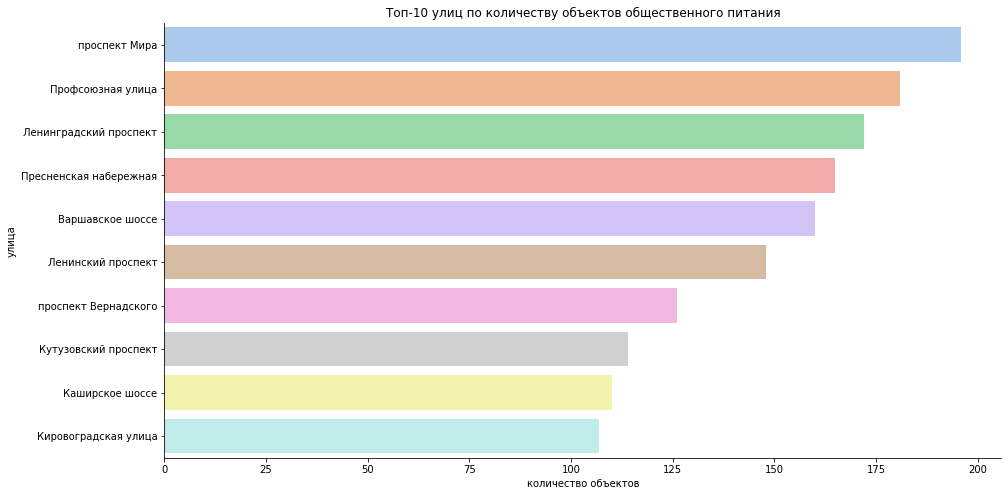

In [35]:
plt.figure(figsize=(15,8));
ax = sns.countplot(y='street', data = df, order=pd.value_counts(df['street']).iloc[:10].index, orient = 'h')
ax.set_title('Топ-10 улиц по количеству объектов общественного питания');
ax.set_xlabel('количество объектов');
ax.set_ylabel('улица');
sns.despine();

Больше всего объектов питания на Проспекте Мира, Профсоюзной улице и Ленинградском проспекте. Эо ожидаемо, т.к. эти улицы очень протяженные и находится не так далеко от центра города

Построим таблицу с топ-10 улиц по количеству объектов общественного питания

In [36]:
top_10_by_street = df.query('street != ""').groupby(['town','street']).agg({'id':'count'}).reset_index().sort_values(by = 'id', ascending = False).head(10)
top_10_by_street.columns = ['town','street','qty']
top_10_by_street['address'] = top_10_by_street['town'] + ' , '+top_10_by_street['street']
top_10_by_street

,town,street,qty,address
1425,город Москва,проспект Мира,196,"город Москва , проспект Мира"
1041,город Москва,Профсоюзная улица,181,"город Москва , Профсоюзная улица"
729,город Москва,Ленинградский проспект,172,"город Москва , Ленинградский проспект"
1026,город Москва,Пресненская набережная,165,"город Москва , Пресненская набережная"
451,город Москва,Варшавское шоссе,160,"город Москва , Варшавское шоссе"
732,город Москва,Ленинский проспект,148,"город Москва , Ленинский проспект"
1422,город Москва,проспект Вернадского,126,"город Москва , проспект Вернадского"
720,город Москва,Кутузовский проспект,114,"город Москва , Кутузовский проспект"
646,город Москва,Каширское шоссе,110,"город Москва , Каширское шоссе"
651,город Москва,Кировоградская улица,107,"город Москва , Кировоградская улица"


Далее будет описан код в текстовых ячейках, который я использовала для получения района через API. Т.к. ключ я не могу приложить, то выкачала результат запроса в CSV и считываю результат уже из него

Настроим геокодер Яндекса. Считаем токен из yaml файла

from yaml import load, FullLoader

config = load(open('config.yaml'), Loader=FullLoader)
token = config['yandex_maps']['token']

- Напишем функцию set_district, которая по адресу будет делать запрос к API Яндекса и возвращать район, если его найдет в ответе от API и error - в обратном случае. API Яндекса не возвращает название района, если сделать запрос по адресу, но возвращает его, если сделать запрос по координатам. Сначала по адресу мы будем находить координаты, после чего - район.
- Напишем вспомогательную функцию filter_district, которая в json ответе будет находить название района. В ответе может быть несколько элементов с типом district. Мы будем считать приоритетным тот, в котором содержиться "район", если такой не нашелся - будем брать последний

def filter_district(json): # функция по json ответу возращает название района
    components = json['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['metaDataProperty']['GeocoderMetaData']\
['Address']['Components']
    districts = list(filter(lambda c: c['kind'] == 'district', components))
    district_name = None
    for district in districts: 
        if 'район ' in district['name'] or ' район' in district['name']:
            district_name = district['name']
    if not district_name:
        district_name = districts[len(districts)-1]['name']
    return district_name

def set_district(address): # функция возвращает район по адресу 
    district = ''
    params = {
    'geocode': address,
    'format': 'json',
    'apikey': token
    }
    r = requests.get(API_URL, params=params) # делаем запрос по адресу
    try:
        coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]\
        ['GeoObject']['Point']['pos'] # находим координаты объекта в ответе
    except:
        return 'error coordinates'
    params = {
    'geocode': coordinates,
    'format': 'json',
    'apikey': token,
    'kind': 'district'
    }
    r = requests.get(API_URL, params=params) # делаем запрос по координатам объекта
    try:
        district = filter_district(r.json()) # находим район из ответа
    except:
        district = 'error district'
        
    
    return district
      
top_10_by_street['district'] = top_10_by_street['address'].apply(set_district)
top_10_by_street.to_csv('top_10_by_street.csv')

Считаем результат из файла

In [37]:
spreadsheet_id = '1eHGaDHOY6ew2HzwbFBwnb1SlmwtvgBxs1Zeai0C-xew' 
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
res_top_10 = pd.read_csv(BytesIO(r.content), index_col = 0)
res_top_10

,town,street,qty,address,district
1425,город Москва,проспект Мира,196,"город Москва , проспект Мира",Алексеевский район
1041,город Москва,Профсоюзная улица,181,"город Москва , Профсоюзная улица",район Коньково
729,город Москва,Ленинградский проспект,172,"город Москва , Ленинградский проспект",Хорошёвский район
1026,город Москва,Пресненская набережная,165,"город Москва , Пресненская набережная",Пресненский район
451,город Москва,Варшавское шоссе,160,"город Москва , Варшавское шоссе",район Чертаново Южное
732,город Москва,Ленинский проспект,148,"город Москва , Ленинский проспект",Ломоносовский район
1422,город Москва,проспект Вернадского,126,"город Москва , проспект Вернадского",Ломоносовский район
720,город Москва,Кутузовский проспект,114,"город Москва , Кутузовский проспект",район Дорогомилово
646,город Москва,Каширское шоссе,110,"город Москва , Каширское шоссе",район Москворечье-Сабурово
651,город Москва,Кировоградская улица,107,"город Москва , Кировоградская улица",район Чертаново Центральное


Название района проставилось корректно, ошибок не возникло.
Две улицы находятся в Ломоносовском районе. В остальных районах по одной улице, входящей в топ-10

- ### <a id="step2.8">Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

Найдем число улиц с одним объектом общественного питания

In [38]:
rest_qty_by_street_1 = df.query('street != ""').groupby(['town','street']).agg({'id':'count'}).reset_index()
rest_qty_by_street_1.columns = ['town','street','qty']
rest_qty_by_street_1 = rest_qty_by_street_1.query('qty == 1')
rest_qty_by_street_1 = rest_qty_by_street_1.merge(df,on = ['town','street'])[['town','street','qty','address']]
rest_qty_by_street_1.shape[0]

624

На 624 улицах находится лишь одна точка общественного питаия

Далее описан код в текстовой ячейке для получения региона из адреса через API. Т.к. ключ я не могу приложить то выкачала результат запроса в CSV и считываю результат уже из него

rest_qty_by_street_1['district'] = rest_qty_by_street_1['address'].apply(set_district)
rest_qty_by_street_1.to_csv('rest_qty_by_street_1.csv')

Считаем результат из файла

In [39]:
spreadsheet_id = '1EzAahyZo55TwZy_SVmhXzFqbcKWhPvlg9nvLrJHRCZo' 
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
res = pd.read_csv(BytesIO(r.content), index_col = 0)
res.head()

,town,street,qty,address,district
0,Боровское шоссе,29-й километр,1,"город Москва, поселение Внуковское, Боровское шоссе, 29-й километр, домовладение 4, строение 1",квартал № 11
1,Варшавское шоссе,27-й километр,1,"город Москва, город Щербинка, Варшавское шоссе, 27-й километр, владение 6, строение 1",error district
2,Калужское шоссе,43-й километр,1,"город Москва, поселение Краснопахорское, Калужское шоссе, 43-й километр, владение 1, строение 1",квартал № 181
3,Киевское шоссе,21-й километр,1,"город Москва, поселение ""Мосрентген"", Киевское шоссе, 21-й километр, домовладение 3, строение 1",квартал № 2
4,Киевское шоссе,28-й километр,1,"город Москва, поселение Московский, Киевское шоссе, 28-й километр, владение 2, строение 1",квартал № 65


Посмотрим на записи, где не обнаружился район

In [40]:
res.query('district == "error district"')

,town,street,qty,address,district
1,Варшавское шоссе,27-й километр,1,"город Москва, город Щербинка, Варшавское шоссе, 27-й километр, владение 6, строение 1",error district
554,город Троицк,1-й Заречный переулок,1,"город Москва, город Троицк, 1-й Заречный переулок, дом 17",error district
555,город Троицк,39-й километр Калужского шоссе,1,"город Москва, город Троицк, 39-й километр Калужского шоссе, дом 13Г",error district
556,город Троицк,Большая Октябрьская улица,1,"город Москва, город Троицк, Большая Октябрьская улица, дом 4",error district
557,город Троицк,Пионерская улица,1,"город Москва, город Троицк, Пионерская улица, дом 2",error district
560,город Троицк,Юбилейная улица,1,"город Москва, город Троицк, Юбилейная улица, дом 3",error district
561,город Щербинка,2-я Барышевская улица,1,"город Москва, город Щербинка, 2-я Барышевская улица, дом 1",error district
562,город Щербинка,Спортивная улица,1,"город Москва, город Щербинка, Спортивная улица, дом 23",error district
563,город Щербинка,улица Авиаторов,1,"город Москва, город Щербинка, улица Авиаторов, дом 9",error district


Эти объекты находятся в Щербинке и Троицке, эти адреса не относятся к какому-либо району

Посмотрим на записи, где по адресу не удалось найти координаты

In [41]:
res.query('district == "error coordinates"')


,town,street,qty,address,district
50,город Москва,104-й километр Московской Кольцевой Автодороги,1,"город Москва, 104-й километр Московской Кольцевой Автодороги, дом 6",error coordinates
89,город Москва,26-й километр Московской Кольцевой Автодороги,1,"город Москва, 26-й километр Московской Кольцевой Автодороги, владение 6",error coordinates
105,город Москва,30-й километр Московской Кольцевой Автодороги,1,"город Москва, 30-й километр Московской Кольцевой Автодороги, владение 6",error coordinates
106,город Москва,31-й километр Московской Кольцевой Автодороги,1,"город Москва, 31-й километр Московской Кольцевой Автодороги, владение 8, строение 1",error coordinates
107,город Москва,34-й километр Московской Кольцевой Автодороги,1,"город Москва, 34-й километр Московской Кольцевой Автодороги, владение 6",error coordinates
115,город Москва,42-й километр Московской Кольцевой Автодороги,1,"город Москва, 42-й километр Московской Кольцевой Автодороги, владение 4, строение 1",error coordinates
120,город Москва,56-й километр Московской Кольцевой Автодороги,1,"город Москва, 56-й километр Московской Кольцевой Автодороги, дом 10",error coordinates
125,город Москва,65-й километр Московской Кольцевой Автодороги,1,"город Москва, 65-й километр Московской Кольцевой Автодороги, владение 8",error coordinates
126,город Москва,67-й километр Московской Кольцевой Автодороги,1,"город Москва, 67-й километр Московской Кольцевой Автодороги, дом 7",error coordinates
130,город Москва,78-й километр Московской Кольцевой Автодороги,1,"город Москва, 78-й километр Московской Кольцевой Автодороги, дом 14, корпус 1",error coordinates


Яндекс карты не позволяют искат адреса, обозначенные через км МКАД

Проставим в строки, где не удалось найти район - NaN

In [42]:
res.replace('error district',np.NaN, inplace = True)
res.replace('error coordinates',np.NaN, inplace = True)
res.query('district == "error coordinates" or district == "error district"').shape[0]

0

Посмотрим топ-10 районов с одним объектов общественного питания на улице

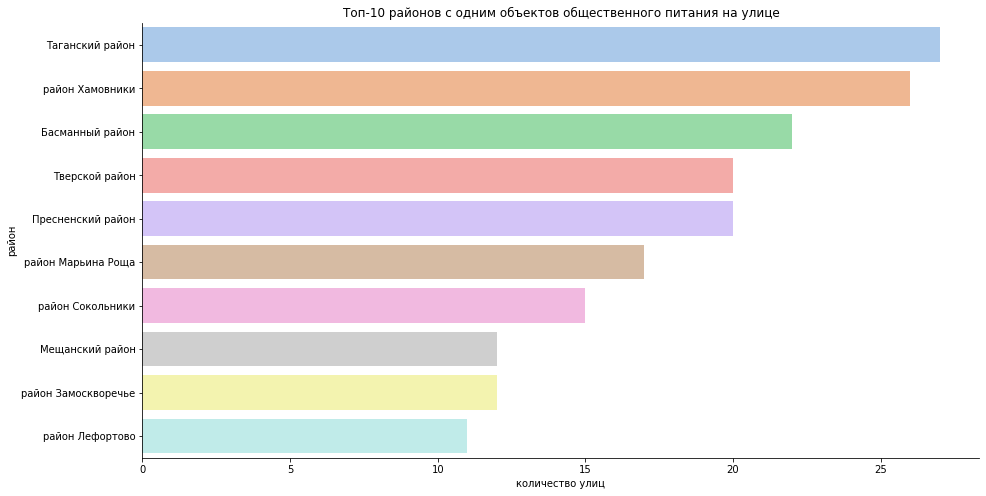

In [43]:
plt.figure(figsize=(15,8));
ax = sns.countplot(y='district', data = res, order=pd.value_counts(res['district']).iloc[:10].index, orient = 'h')
ax.set_title('Топ-10 районов с одним объектов общественного питания на улице');
ax.set_xlabel('количество улиц');
ax.set_ylabel('район');
sns.despine();

В топ-10 районов с одним объектов общественного питания на улице старые районы города. Возможно, это связано с тем, что в старых районах города много маленьких улочек и переулков. Из-за того, что улицы короткие на них не помещается много объектов

- ### <a id="step2.9">Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

Построим распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

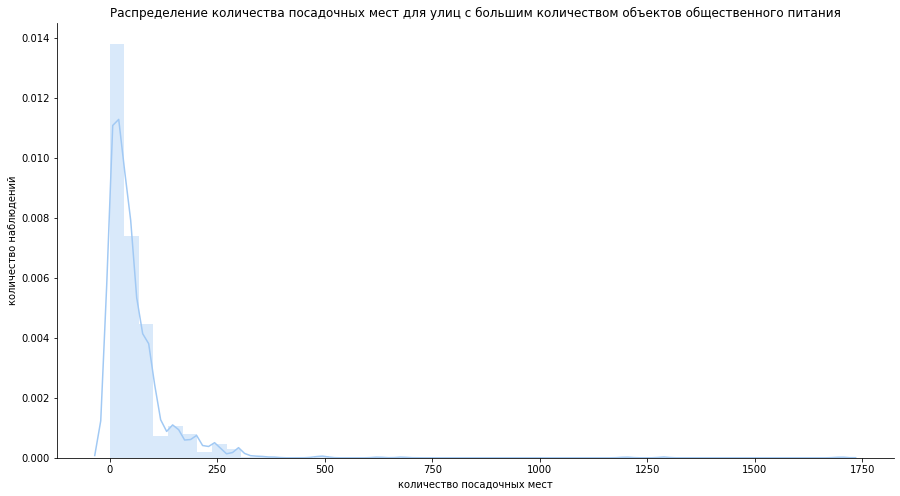

In [44]:
plt.figure(figsize=(15,8));
top_streets = res_top_10['street'];
ax =sns.distplot(df.query('street in @top_streets')['number'].dropna())
ax.set_title('Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания');
ax.set_xlabel('количество посадочных мест');
ax.set_ylabel('количество наблюдений');
sns.despine();

Больше всего мест с небольшим количеством мест и совсем немного с более чем 250 посадочными местами

По распределению количества мест можем предположить, что на этих улицах больше всего кафе и предприятий быстрого обслуживания. Проверим это. Посчитаем для каждого из типов заведения долю, которую он составляет от всех заведений на улице

In [45]:
top_10_by_type = df.query('street in @top_streets').groupby(['street','type']).agg({'id':'count'}).reset_index()
top_10_by_type =top_10_by_type.merge(top_10_by_street[['street','qty']], on = 'street')
top_10_by_type.columns = ['street','type','qty','total_qty']
top_10_by_type['ratio'] = top_10_by_type['qty'] / top_10_by_type['total_qty'] * 100
top_10_by_type.head()

,street,type,qty,total_qty,ratio
0,Варшавское шоссе,бар,6,160,3.75
1,Варшавское шоссе,буфет,6,160,3.75
2,Варшавское шоссе,закусочная,2,160,1.25
3,Варшавское шоссе,кафе,62,160,38.75
4,Варшавское шоссе,кафетерий,8,160,5.00


Построим график, отображающий доли типов объекта общественного питания на топ-10 улиц

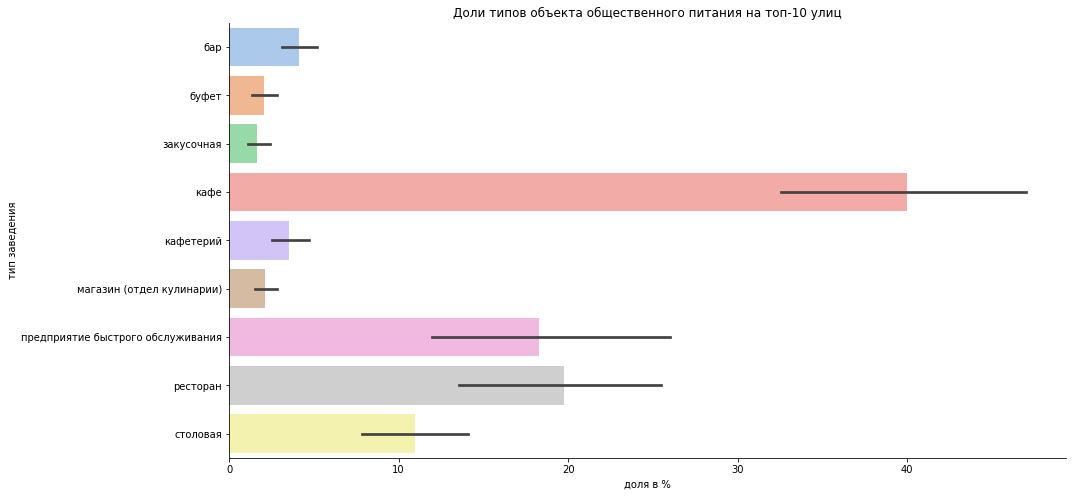

In [46]:
plt.figure(figsize=(15,8));
ax = sns.barplot(x = 'ratio', y = 'type',data = top_10_by_type);
ax.set_title('Доли типов объекта общественного питания на топ-10 улиц');
ax.set_xlabel('доля в %');
ax.set_ylabel('тип заведения');
sns.despine();

Так и есть, кафе и предприятий быстрого обслуживания больше всего, также на этих улицах много ресторанов

- ### <a id="step2.10"> Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также месте расположения. Прокомментируйте возможность развития сети.</a>

### Вывод

- Больше всего в Москве кафе. Они составляют 40% рынка. Несетевых заведений больше сетевых в 4 раза
- Для сетевых заведений характерно большое количество заведений с небольшим количеством мест: предприятий быстрого обслуживания, ресторанов, кафе и кулинарий
- Посадочных мест больше всего в столовых (более 100); около 30 в барах, буфетах и кафе; в закусочных, кулинариях и предприятиях быстрого обслуживания - менее 10
- В топ-10 улиц по количеству точек общественного питания на улицу входят проспект Мира, Профсоюзная улица, Ленинградский проспект. На этих улицах больше всего мест с небольшим количеством мест и совсем немного с более чем 250 посадочными местами. На этих улицах расположено больше всего кафе, ресторанов и предприятий быстрого обслуживания
- В топ-10 районов с одним объектов общественного питания на улице входят старые районы города, такие как Таганский, Хамовники, Басманный 


### Рекомендации

- На улицах с большим количеством точек общественного питания уже много кафе, ресторанов и предприятий быстрого обслуживания, но совсем немного баров. Пресненская набережная входит в топ-10 по количеству заведений на улице. Рекомендуем открыть бар на Пресненской набережной, т.к. рядом расположен Москва-Сити и люди после работы с удовольствием сходят с коллегами в бар.  В Сити расположено много технологических компаний и их работникам будет интересно посмотреть на роботов-официантов. Рекомендуем сделать 30 посадочных мест = это среднее количеств мест для баров в Москве
- Далее можно будет развить сеть и располагать заведения около бизнес-центров. Для сетей характерны места с небольшим количеством мест

### <a id="step3">Шаг 3. Подготовка презентации</a>

Презентация: https://drive.google.com/file/d/1yCAlBNjzqYy_nKTxP8vnJ-DoVkmDgMOF/view?usp=sharing